In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import os

In [2]:
def load_dataset():
    datasets_folder = "\\".join(os.getcwd().split('\\')[:-1]) + "\\datasets\\"
    df = pd.read_csv(datasets_folder+'cardio_train.csv',sep=';').set_index('id')
    return df
df = load_dataset()
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
## Removing Outliers

### Distributions of Continuous Features

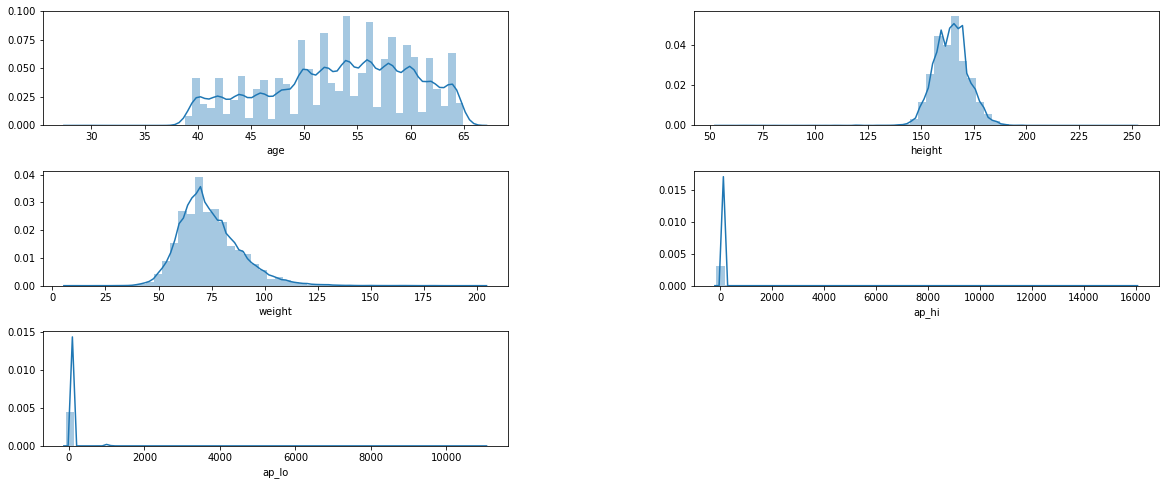

In [4]:
column = ['height', 'weight', 'ap_hi', 'ap_lo']

fig = plt.figure(figsize =(20,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(321)
sns.distplot(df['age']/365)

for i in range(2, 6):
    ax = fig.add_subplot(3, 2, i)
    sns.distplot(df[column[i-2]])

### Boxplots

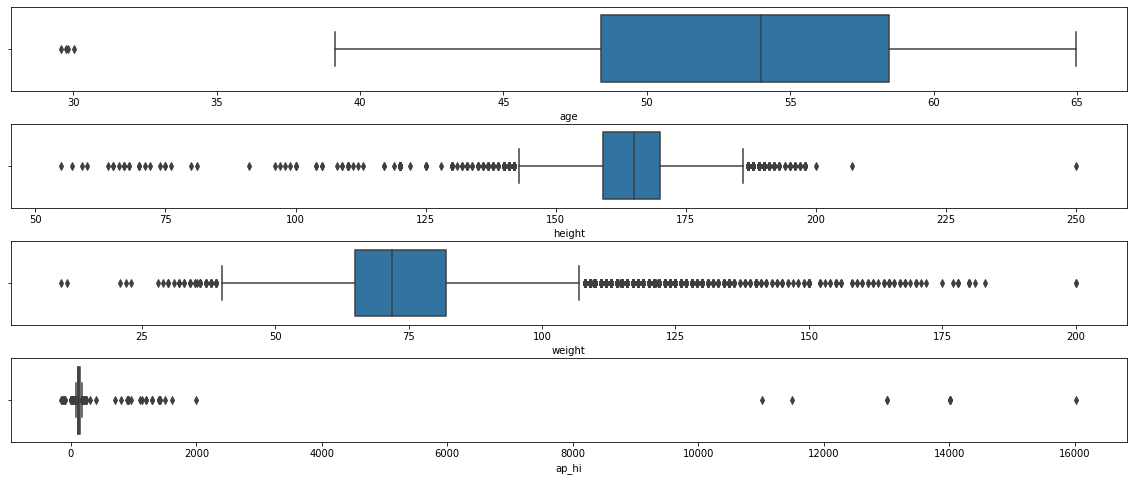

In [5]:
column = ['height', 'weight', 'ap_hi', 'ap_lo']

fig = plt.figure(figsize =(20,8))
fig.subplots_adjust(hspace=0.4, wspace=0.8)

ax = fig.add_subplot(411)
sns.boxplot(df['age']/365)

for i in range(2, 5):
    ax = fig.add_subplot(4, 1, i)
    sns.boxplot(df[column[i-2]])

## Distributions of Categorical Features

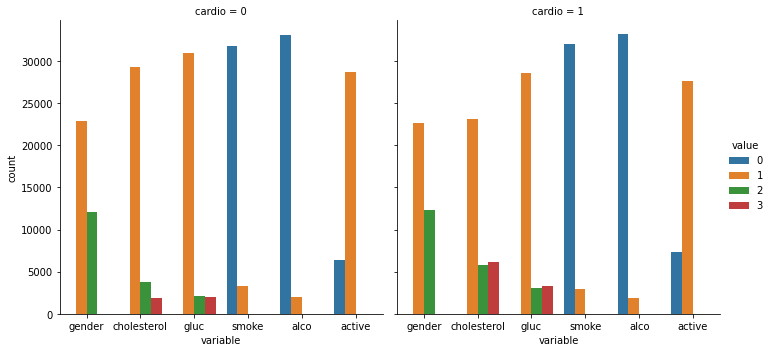

In [6]:
cat_features = ['gender','cholesterol','gluc', 'smoke', 'alco', 'active']
df_long = pd.melt(df, id_vars=['cardio'], value_vars=cat_features)
sns.catplot(x="variable", hue="value", col="cardio",data=df_long, kind="count")
plt.show()

In [7]:
df['BMI'] = df['weight']/((df['height']/100)**2)
# sns.catplot(x="gender", y="BMI", hue="alco", col="cardio", data=df, color = "yellow",kind="box", height=10, aspect=.7);

## Bi-Variate Visualisations

### Visualising features wrt - Cardio vascular disease (0 - Absent, 1 - Present)

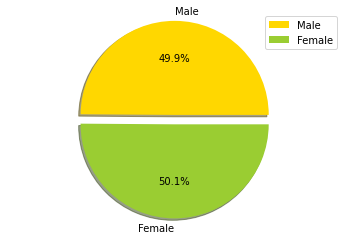

In [14]:
data = df.gender.groupby(df.cardio).sum()
labels = ['Male', 'Female']

colors = ['gold', 'yellowgreen']#, 'lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(data, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.legend()
plt.axis('equal')
plt.show()

In [8]:
df.gender.groupby(df.cardio).sum()

cardio
0    47128
1    47342
Name: gender, dtype: int64

### Visualising the characteristics based on gender and BMI

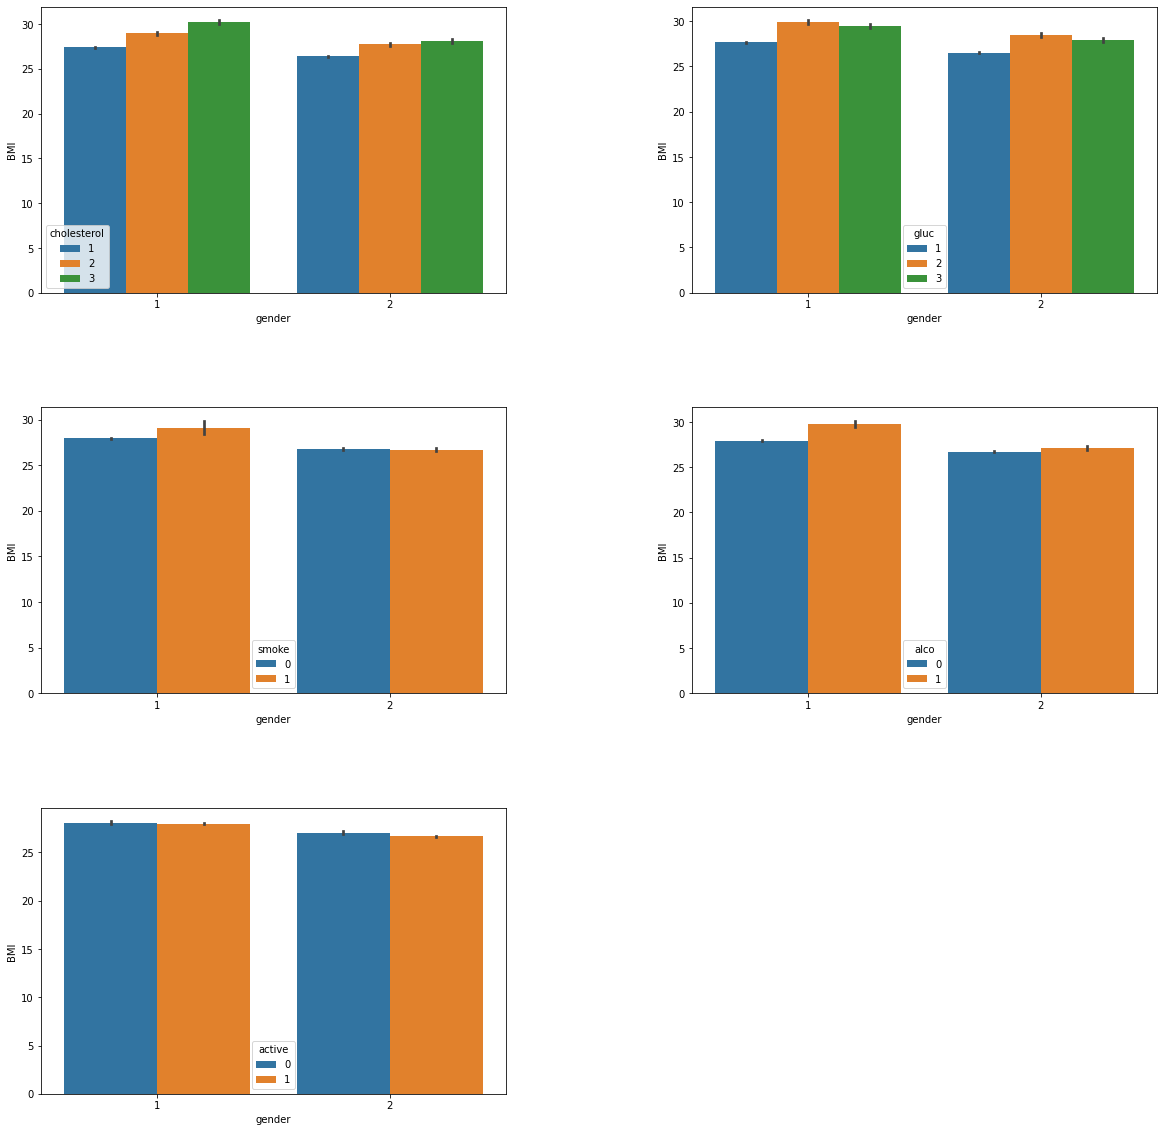

In [8]:
cat_column = ['cholesterol','gluc', 'smoke', 'alco', 'active']

fig = plt.figure(figsize =(20,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(1, 6):
    ax = fig.add_subplot(3, 2, i)
    sns.barplot(x='gender',y='BMI', data=df, hue=cat_column[i-1])